## Fintech Customer Loan Performance

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import ttest_ind

# Load data from file
# Adjust with the actual file path
file_path = 'data/credit_default.json'           # real data
# file_path = 'data/credit_default_sample.json'  # sample data
df = pd.read_json(file_path)

# Display the first 10 rows of the DataFrame
df.head(10)


,id,age,sex,job,housing,purpose,avg_saving_balance,avg_checking_balance,avg_credit_amt,avg_duration,default
0,350890805089992,18,male,NaN,free,phone,3.641077,45.433891,142.879925,8.280582,0
1,11245003525183,59,none,NaN,own,education,8.223161,69.884568,574.985447,21.562853,1
2,358755057148774,51,none,3.0,rent,education,1.826520,24.613184,418.298206,1.216065,0
3,358031066572903,37,male,2.0,rent,phone,3.311494,43.763247,2300.630079,17.771295,1
4,356996017697235,60,male,NaN,own,phone,0.803782,42.608367,24.525963,8.616881,0
5,357441058697413,50,female,NaN,rent,education,2.194060,25.443081,813.234835,5.000407,0
6,350890808192447,42,none,NaN,rent,education,9.147327,4.435961,1660.739068,18.573375,0
7,358031061202316,37,none,2.0,rent,vacation,0.368338,51.056865,604.667569,22.366342,0
8,353166054554136,56,female,3.0,rent,vehicle,9.426335,19.266602,3042.366611,30.998753,1
9,357441052808958,53,male,2.0,rent,vehicle,9.382370,23.320359,427.946539,1.005957,0


#### Problem Statement:

- Problem: Meningkatkan kinerja customer loan product.
- Question: Apa faktor-faktor yang mempengaruhi default pada customer loan product?
- Steps:
  - Data Collection: 
    Mengumpulkan data yang komprehensif tentang profil pelanggan dan informasi terkait pinjaman.
  - Data Preprocessing: 
    Membersihkan dan mentransformasi data untuk memastikan kualitas dan relevansinya.
  - Descriptive Analysis: 
    Menganalisis dataset secara deskriptif untuk memahami karakteristik dan pola data.
  - Hypothesis Testing: 
    Melakukan uji statistik untuk mengidentifikasi atribut yang signifikan memengaruhi default pinjaman.
  - Classification Model: 
    Mengembangkan model prediktif untuk memproyeksikan kejadian default pelanggan.

#### Descriptive Analysis:

- Meneliti distribusi usia, jenis kelamin, pekerjaan, status tempat tinggal, tujuan pinjaman, saldo rata-rata, dan durasi pinjaman.
- Menghitung statistik deskriptif seperti rata-rata, median, modus, dan memvisualisasikan data menggunakan grafik dan diagram.

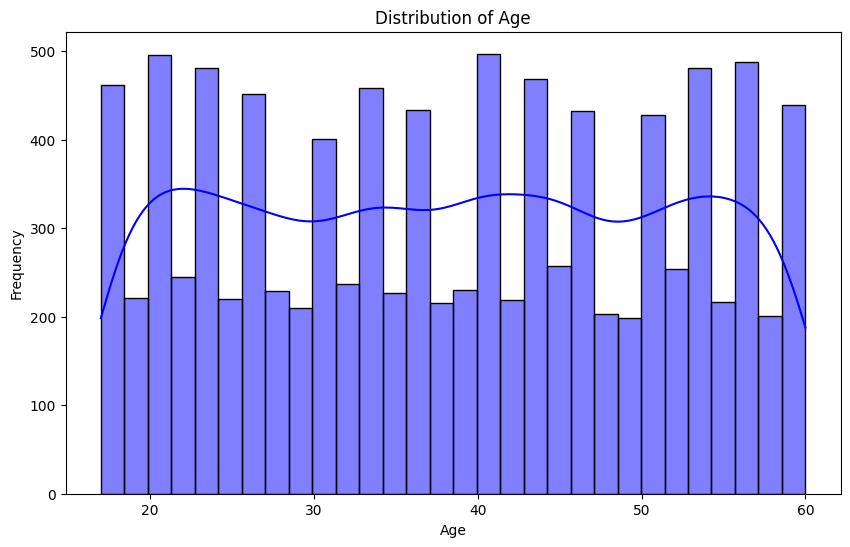

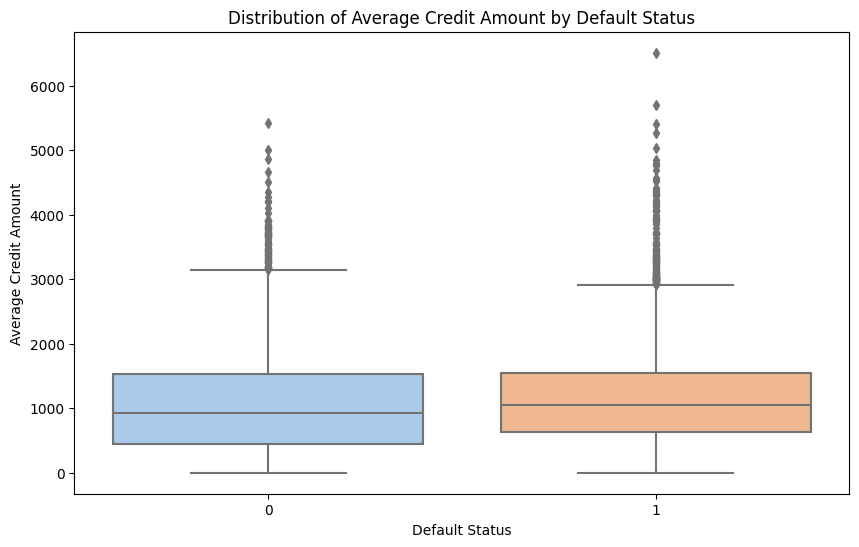

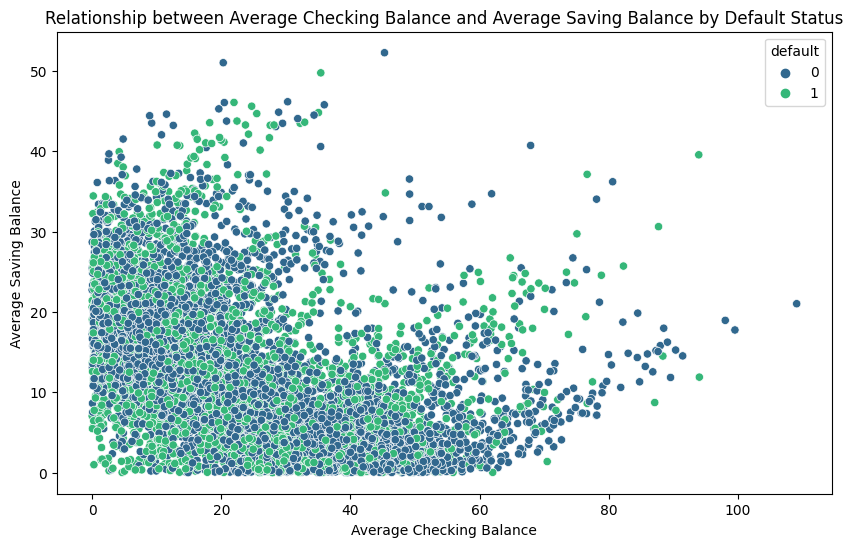

In [2]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of average credit amount by default status
plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='avg_credit_amt', data=df, palette='pastel')
plt.title('Distribution of Average Credit Amount by Default Status')
plt.xlabel('Default Status')
plt.ylabel('Average Credit Amount')
plt.show()

# Visualizing the relationship between average checking balance and average saving balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_checking_balance', y='avg_saving_balance', hue='default', data=df, palette='viridis')
plt.title('Relationship between Average Checking Balance and Average Saving Balance by Default Status')
plt.xlabel('Average Checking Balance')
plt.ylabel('Average Saving Balance')
plt.show()


#### Attribute yang Mempengaruhi Default:

- Melakukan uji statistik (t-test) untuk menentukan apakah atribut tertentu memiliki pengaruh signifikan terhadap default.
- Contoh: Uji apakah ada perbedaan yang signifikan antara rata-rata durasi kredit untuk pelanggan yang default dan yang tidak.

In [6]:
# Statistical Significance Test for Attributes Influencing Default

from scipy.stats import ttest_ind

# Example: Test whether there is a significant difference in the average duration of credit for customers who default and those who do not.
def check_statistical_significance(attribute, confidence_level=0.95):
    default_yes = df[df['default'] == 1][attribute]
    default_no = df[df['default'] == 0][attribute]

    # Perform t-test
    t_stat, p_value = ttest_ind(default_yes, default_no)

    # Check for statistical significance
    if p_value < (1 - confidence_level):
        print(f"There is a significant difference in {attribute} for customers who default and those who do not.")
    else:
        print(f"There is no significant difference in {attribute} for customers who default and those who do not.")

# Statistical test for multiple attributes
attributes_to_test = ['avg_duration', 'avg_saving_balance', 'avg_checking_balance', 'avg_credit_amt']

for attribute in attributes_to_test:
    check_statistical_significance(attribute)


There is a significant difference in avg_duration for customers who default and those who do not.
There is a significant difference in avg_saving_balance for customers who default and those who do not.
There is a significant difference in avg_checking_balance for customers who default and those who do not.
There is a significant difference in avg_credit_amt for customers who default and those who do not.


Kode di atas berfungsi untuk melakukan uji statistik (t-test) pada beberapa atribut untuk menentukan apakah terdapat perbedaan signifikan antara pelanggan yang mengalami default dan yang tidak. 

Contoh yang disertakan adalah menguji apakah terdapat perbedaan signifikan dalam rata-rata durasi kredit untuk pelanggan yang mengalami default dan yang tidak. Namun, kita dapat mengganti atribut-atribut yang diuji sesuai dengan analisis yang ingin kita lakukan.

Hasil dari uji statistik ini digunakan untuk menentukan apakah atribut tertentu memiliki pengaruh signifikan terhadap kejadian default pada pelanggan. Hasil keluaran mencakup pesan yang memberitahu apakah ada perbedaan signifikan atau tidak pada tingkat kepercayaan 95%.

#### Classification Model:

- Membagi data menjadi set pelatihan dan pengujian.
- Membangun model klasifikasi (contoh: RandomForestClassifier).
- Melakukan hyperparameter tuning untuk meningkatkan kinerja model.

In [7]:
# Separating features and target
X = df.drop(['id', 'default'], axis=1)
y = df['default']

# Handling categorical variables with one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Imputing missing values with the mean of each column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Building RandomForestClassifier model
model = RandomForestClassifier()

# Performing hyperparameter tuning
# (Using GridSearchCV to find the best combination of hyperparameters)
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Reducing cv value to match the number of samples
grid_search = GridSearchCV(model, param_grid, cv=min(5, len(y_train.unique())))
grid_search.fit(X_train_imputed, y_train)

best_model = grid_search.best_estimator_

# Making predictions
y_pred = best_model.predict(X_test_imputed)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7615
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83      1289
           1       0.79      0.45      0.57       711

    accuracy                           0.76      2000
   macro avg       0.77      0.69      0.70      2000
weighted avg       0.77      0.76      0.74      2000



### Kesimpulan

Dalam rangka mempersiapkan model prediktif untuk memprediksi kemungkinan default pelanggan, beberapa langkah penting telah dilakukan:

1. **Persiapan Data (Data Preprocessing):**
   - Fitur dan target dipisahkan.
   - Variabel kategorikal diatasi menggunakan one-hot encoding.
   - Data dibagi menjadi set pelatihan dan pengujian.
   - Nilai yang hilang diimputasi dengan rata-rata dari setiap kolom.

2. **Pembangunan Model dan Penyetelan Hyperparameter (Model Building and Hyperparameter Tuning):**
   - Model RandomForestClassifier dibangun.
   - Penyetelan hyperparameter dilakukan menggunakan GridSearchCV untuk mencari kombinasi terbaik dari hyperparameter.

3. **Evaluasi Model (Model Evaluation):**
   - Prediksi dilakukan menggunakan model terbaik.
   - Performa model dievaluasi berdasarkan akurasi dan laporan klasifikasi.

Dengan serangkaian proses ini, diharapkan bahwa model yang dihasilkan dapat memberikan prediksi yang andal terkait kemungkinan default pelanggan. Evaluasi akurasi dan laporan klasifikasi memberikan wawasan tambahan tentang seberapa baik model dapat melakukan prediksi. 